In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("taxi_train.csv.zip")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  
 14  month                 

In [4]:
df["store_and_fwd_flag"].value_counts()#counting the values in this column

N    34823
Y      177
Name: store_and_fwd_flag, dtype: int64

In [3]:
d={"N":0,"Y":1}
df["store_and_fwd_flag"]=df["store_and_fwd_flag"].replace(d)

In [6]:
df["rate_code"].unique()#probably have to drop this column because it is of no use

array([1, 3, 5, 4, 2], dtype=int64)

In [32]:
df.drop(["rate_code"],axis=1,inplace=True)

In [25]:
df.drop(["store_and_fwd_flag"],axis=1,inplace=True)

In [26]:
df.drop(["payment_type"],axis=1,inplace=True)

In [4]:
df.drop(["pickup_location_id","dropoff_location_id"],axis=1,inplace=True)

In [5]:
df.drop(["year","month","day","day_of_week","hour_of_day"],axis=1,inplace=True)#dropping these columns as to make things easier as trying the regression first time

In [14]:
df.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration,calculated_total_amount
0,9.01,26.0,0.0,0.5,8.14,5.76,0.3,40.70,2131.0,24.30
1,0.20,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2377.0,37.40
2,9.65,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1286.0,30.36
3,9.50,30.0,0.5,0.5,9.25,5.76,0.3,46.31,2586.0,4.30
4,5.80,21.5,0.5,0.5,4.56,0.00,0.3,27.36,1575.0,23.80


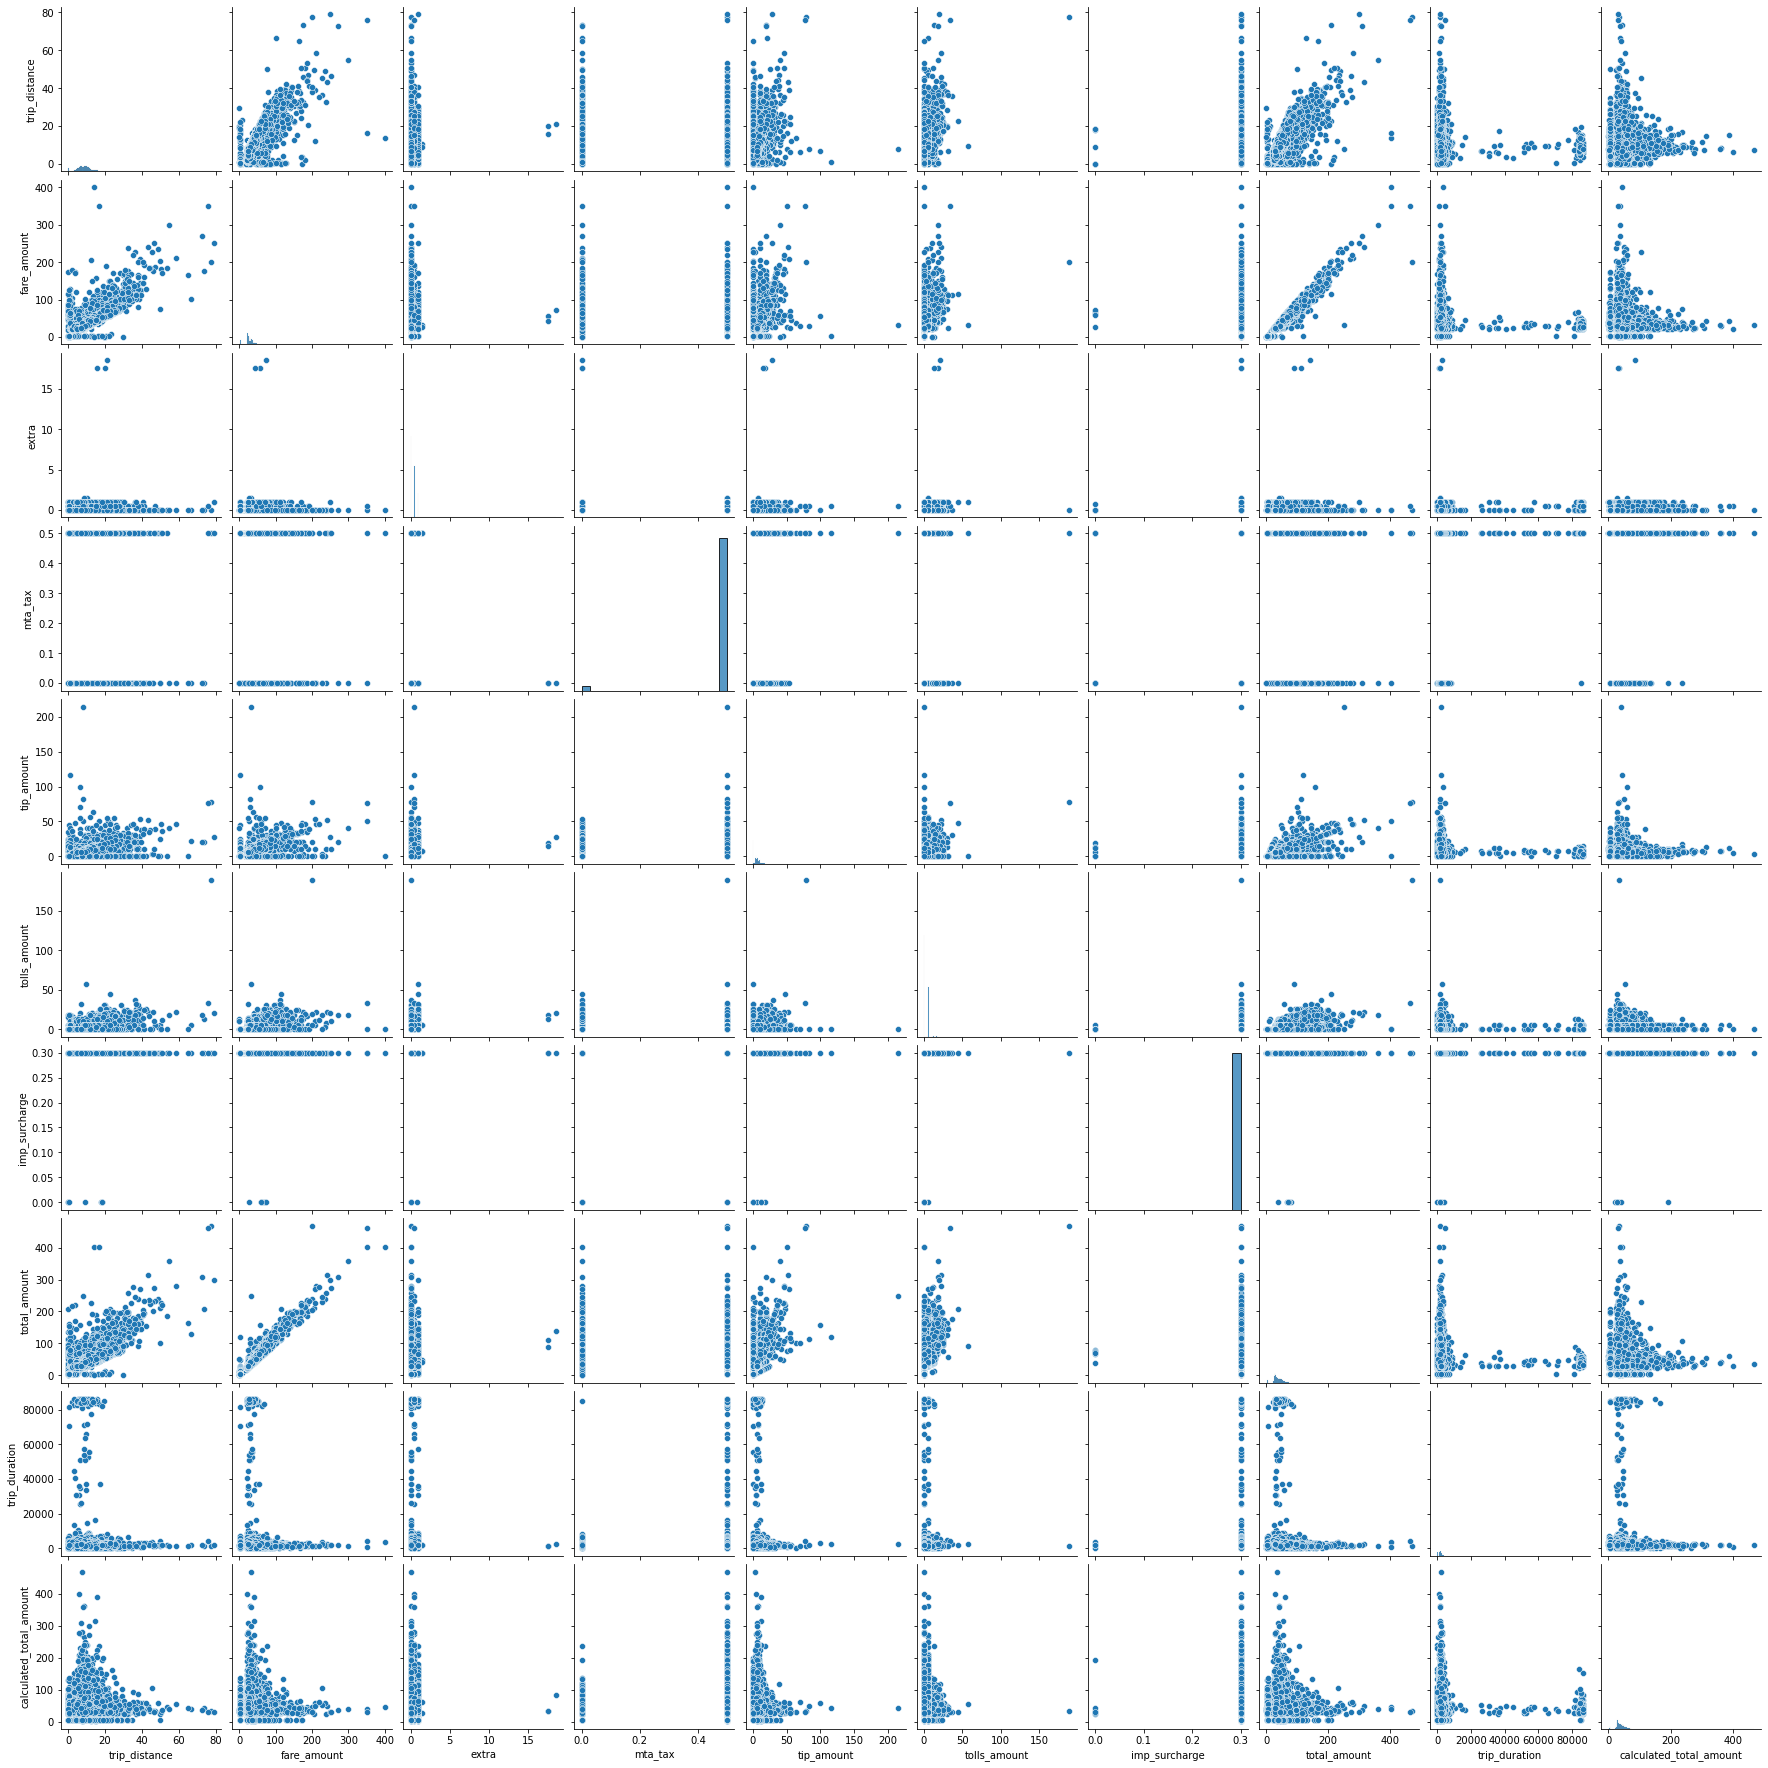

In [13]:
sns.pairplot(df)

In [20]:
#many functions can be used to get the input and the output data
X=df.loc[:, df.columns != "calculated_total_amount"]
y=df[["calculated_total_amount"]]

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [27]:
lasso=Lasso()

In [28]:
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,55,100]}

In [29]:
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5180822.331691568, tolerance: 1037.558574384944
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245191.611603047, tolerance: 1049.8943665892716
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5130085.1177009735, tolerance: 1027.4527754884919
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [30]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-367.21554248138347


In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-367.22649404329064


# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("taxi_train.csv.zip")

In [8]:
df.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

In [6]:
##Checking the total row where the total amount is maximum
df[df["calculated_total_amount"]==df["calculated_total_amount"].max()]

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
5910,7.4,1,N,1,32.5,0.0,0.5,3.3,0.0,0.3,36.6,238,87,2018,11,6,1,11,1873.0,468.35


In [7]:
##Checking the total row where the trip distance is maximum
df[df["trip_distance"]==df["trip_distance"].max()]

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
32871,79.01,1,N,1,250.0,1.0,0.5,28.0,20.16,0.3,299.96,117,117,2018,2,5,0,18,1667.0,30.38


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='calculated_total_amount'>

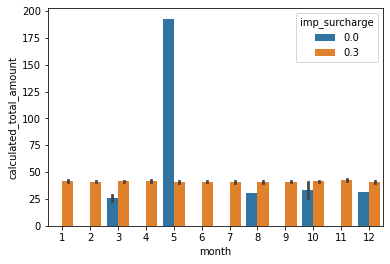

In [24]:
#Visualiztion for understanding the data easily
sns.barplot("month","calculated_total_amount",hue="imp_surcharge",data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Month Vs Total Amount')

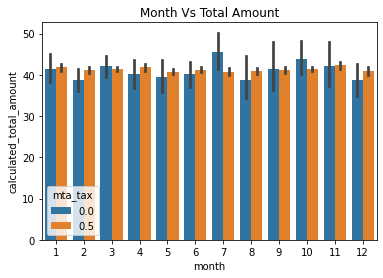

In [11]:
sns.barplot("month","calculated_total_amount",hue="mta_tax",data=df)
plt.title("Month Vs Total Amount")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra', ylabel='count'>

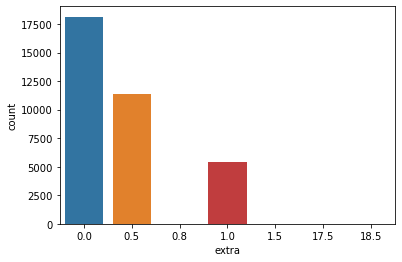

In [17]:
sns.countplot("extra",data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_type', ylabel='calculated_total_amount'>

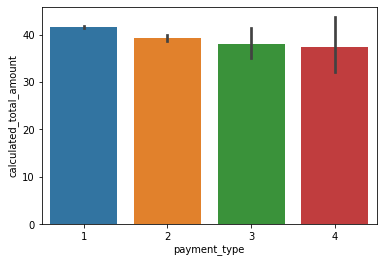

In [8]:
# checking the pattern between payment types and total amount
sns.barplot("payment_type","calculated_total_amount",data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_type', ylabel='calculated_total_amount'>

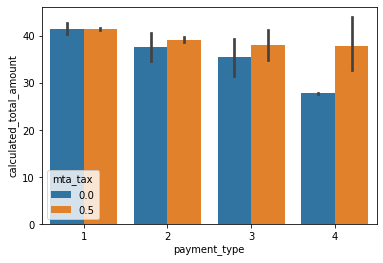

In [6]:
#What is the mta tax applicable on the payment types 
sns.barplot("payment_type","calculated_total_amount",hue="mta_tax",data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_type', ylabel='calculated_total_amount'>

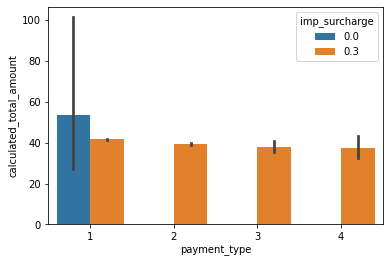

In [7]:
#What is the surcharge applicable on the payment types 
sns.barplot("payment_type","calculated_total_amount",hue="imp_surcharge",data=df)
#as we can see the surcharge is which 0.3 is fully applicable on the payment types 2,3 & 4 

Text(0.5, 1.0, 'HAHA')

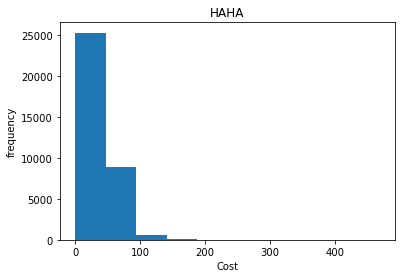

In [10]:
plt.hist("calculated_total_amount",data=df)
plt.xlabel("Cost")
plt.ylabel("frequency")
plt.title("HAHA")

(array([1.4426e+04, 1.8251e+04, 1.9890e+03, 2.4300e+02, 6.3000e+01,
        1.3000e+01, 7.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00]),
 array([1.000e-02, 7.910e+00, 1.581e+01, 2.371e+01, 3.161e+01, 3.951e+01,
        4.741e+01, 5.531e+01, 6.321e+01, 7.111e+01, 7.901e+01]),
 <BarContainer object of 10 artists>)

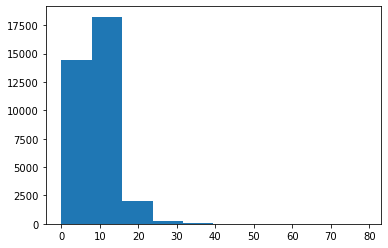

In [9]:
plt.hist("trip_distance",data=df)

In [4]:
df.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

In [6]:
df.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

In [10]:
df["day_of_week"].unique()

array([2, 6, 0, 1, 5, 3, 4], dtype=int64)

In [21]:
df.loc[(df["calculated_total_amount"]>100) & (df["day_of_week"]==6)]

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
1633,12.06,1,N,1,33.5,0.0,0.5,6.86,0.00,0.3,41.16,138,132,2018,1,7,6,11,1332.0,109.20
1672,7.20,1,N,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30,249,36,2018,2,18,6,4,2682.0,101.80
1705,11.88,1,N,1,38.5,0.0,0.5,7.86,0.00,0.3,49.11,80,132,2018,8,19,6,16,2284.0,110.16
2996,6.34,1,N,1,22.0,0.5,0.5,4.66,0.00,0.3,27.96,48,256,2018,1,7,6,2,1655.0,113.46
3348,7.85,1,N,1,25.5,0.0,0.5,5.26,0.00,0.3,31.56,140,33,2018,11,18,6,17,2610.0,104.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32744,7.00,1,N,1,23.5,0.5,0.5,4.96,0.00,0.3,29.76,79,238,2018,3,18,6,3,3163.0,103.50
33576,7.80,1,N,2,24.0,0.0,0.5,0.00,0.00,0.3,24.80,231,237,2018,2,18,6,8,3156.0,115.30
33971,0.03,1,N,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30,141,141,2018,6,17,6,13,1785.0,100.56
34689,5.70,1,N,1,33.5,0.0,0.5,6.85,0.00,0.3,41.15,161,80,2018,3,25,6,18,1009.0,111.62


In [6]:
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration,calculated_total_amount
0,9.01,1,0,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,2131.0,24.30
1,0.20,1,0,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2377.0,37.40
2,9.65,1,0,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1286.0,30.36
3,9.50,1,0,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,2586.0,4.30
4,5.80,1,0,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,1575.0,23.80


In [43]:
import statistics as stats
stats.mode(df["payment_type"])

1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  int64  
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  trip_duration            35000 non-null  float64
 12  calculated_total_amount  35000 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 3.5 MB


In [8]:
y=df[["calculated_total_amount"]]

In [9]:
y

,calculated_total_amount
0,24.30
1,37.40
2,30.36
3,4.30
4,23.80
...,...
34995,29.76
34996,29.15
34997,42.67
34998,26.73


In [10]:
df.drop(["calculated_total_amount"],inplace=True,axis=1)
X=df

In [11]:
X

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration
0,9.01,1,0,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,2131.0
1,0.20,1,0,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2377.0
2,9.65,1,0,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1286.0
3,9.50,1,0,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,2586.0
4,5.80,1,0,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,1575.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,0,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,2998.0
34996,9.16,1,0,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,1419.0
34997,6.78,1,0,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,2459.0
34998,0.26,1,0,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,1932.0


In [12]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

<ipython-input-12-867276381ad1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesRegressor()

In [13]:
print(model.feature_importances_)

[2.83362446e-01 1.31980542e-03 1.66858681e-03 2.62197172e-03
 1.06236383e-01 2.91311396e-02 7.09171039e-04 1.15066823e-01
 1.70184258e-02 2.95332741e-04 1.29448202e-01 3.13121712e-01]


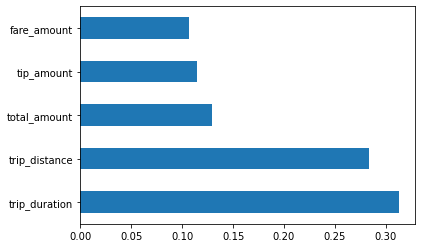

In [14]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [16]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [17]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [20]:
rf=RandomForestRegressor()


In [21]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [22]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  22.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  23.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  41.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  41.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  41.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  41.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  41.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  34.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  30.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 